In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
pd.options.display.max_columns=1000
pd.options.display.max_rows=1000
pd.set_option('display.max_colwidth', -1)
sys.path.insert(0, "C:\\Users\\vberlia\\Documents\\machine_learning")
import itertools 

In [2]:
from machineLearning.dataSummary import DataSummary
from machineLearning.visualizations import Visualization
from machineLearning.ploty_visualization import PlotlyVisualization
import plotly.plotly as py
from machineLearning.missingValues import MissingValue
from machineLearning.models import Model
from machineLearning.modelInputs import KNNInputs
from machineLearning.pipelines import Pipelines
from machineLearning.featureCreation import CreateMeanLookupFeature
from machineLearning.featureCreation import CreateMedianLookupFeature
from machineLearning.featureCreation import CreateFrequencyLookupFeature
from machineLearning.featureCreation import CreateOneHotEncoding
from machineLearning.credit_prediction import classification_report
from machineLearning.featureCreation import CustomCutter
from machineLearning.credit_prediction import raw_features
from machineLearning.credit_prediction import create_features
from machineLearning.credit_prediction import prep_data
from machineLearning.featureCreation import IsMissingFeature
from sklearn import linear_model
from machineLearning.missingValues import CustomQuantitativeImputer
from machineLearning.misc import Misc
from machineLearning.missingValues import CustomEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import ggplot
from ggplot import *
import numpy as np

C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning:

pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp

C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning:

The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead

C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



In [4]:
application_train=pd.read_csv("C:/Users/vberlia/Documents/data/credit_prediction/all/application_train.csv")
# application_newData=pd.read_csv("C:/Users/vberlia/Documents/data/credit_prediction/all/application_test.csv")
# bureau=pd.read_csv("C:/Users/vberlia/Documents/data/credit_prediction/all/bureau.csv")
# bureau_balance=pd.read_csv("C:/Users/vberlia/Documents/data/credit_prediction/all/bureau_balance.csv")
# # credit_card_balance=pd.read_csv("C:/Users/vberlia/Documents/data/credit_prediction/all/credit_card_balance.csv")
home_credit_col_desc=pd.read_csv("C:/Users/vberlia/Documents/data/credit_prediction/all/HomeCredit_columns_description.csv",encoding = "ISO-8859-1")
# intall_payment=pd.read_csv("C:/Users/vberlia/Documents/data/credit_prediction/all/installments_payments.csv")
# pos_cash=pd.read_csv("C:/Users/vberlia/Documents/data/credit_prediction/all/POS_CASH_balance.csv")
# prev_app=pd.read_csv("C:/Users/vberlia/Documents/data/credit_prediction/all/previous_application.csv")
# sample_submi=pd.read_csv("C:/Users/vberlia/Documents/data/credit_prediction/all/sample_submission.csv")

In [5]:
train_sample=application_train.sample(10000,random_state=0)
train_sample=train_sample.reset_index()
original_index=train_sample['index']
train_sample=train_sample.drop('index',axis=1)

X=train_sample.values
Y=train_sample['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=42)
X_train=pd.DataFrame(X_train)
X_train.columns=train_sample.columns
X_test=pd.DataFrame(X_test)
X_test.columns=train_sample.columns

In [55]:
raw_columns = raw_features.features.raw_columns

"""
Enter the create features function
and data preparer function
"""
final_pipeline=create_features.CreateFeatures.create_all_features1()
dataPreparer=prep_data.PrepData.dataPreparer1

"""
Fitting Logistic Regression: 
Setup the hyperparameters
"""

algorithm='LR'

# class_weight=['balanced','None']
# C=[0.001, 0.01, 0.1, 0.3,0.5,0.7,0.9,1,2,5,9,13,15,17,19,21,50,100,1000]
# penalty=['l2']

class_weight=['balanced']
C=[0.0001,0.001]
penalty=['l2']

# class_weight=['balanced']
# C=[21]
# penalty=['l2']

hyperparams=[class_weight,C,penalty]
combs=list(itertools.product(*hyperparams))

# Save the result in the file
result_file=""

In [85]:
all_report1

,model,params,algorithm,AUC,class_0_precision,class_0_recall,class_0_f1_score,class_0_support,class_1_precision,class_1_recall,class_1_f1_score,class_1_support,total_precision,total_recall,total_f1_score,total_support
1,"LogisticRegression(C=0.0001, class_weight='balanced', dual=False,\n fit_intercept=True, intercept_scaling=1, max_iter=100,\n multi_class='ovr', n_jobs=2, penalty='l2', random_state=None,\n solver='sag', tol=0.0001, verbose=0, warm_start=False)","{'penalty': 'l2', 'C': 0.0001, 'class_weight': 'balanced'}",LR,0.760501,0.96,0.67,0.79,910,0.18,0.73,0.29,90,0.89,0.68,0.75,1000
1,"LogisticRegression(C=0.001, class_weight='balanced', dual=False,\n fit_intercept=True, intercept_scaling=1, max_iter=100,\n multi_class='ovr', n_jobs=2, penalty='l2', random_state=None,\n solver='sag', tol=0.0001, verbose=0, warm_start=False)","{'penalty': 'l2', 'C': 0.001, 'class_weight': 'balanced'}",LR,0.783468,0.96,0.68,0.80,910,0.18,0.72,0.29,90,0.89,0.69,0.75,1000


In [16]:
final_pipeline.__dict__['steps'][4]

('feature_set5', Pipeline(memory=None,
      steps=[('rem_otlr_YEARS_BEGINEXPLUATATION_MEDI', <machineLearning.featureCreation.ClipOutliers object at 0x00000000137169E8>), ('rem_otlr_LANDAREA_AVG', <machineLearning.featureCreation.ClipOutliers object at 0x0000000013716A20>), ('rem_otlr_LIVINGAPARTMENTS_MODE', <machineLearning.featureCreation.ClipOutliers object at 0x0000000013716A58>)]))

In [7]:
# Model Function
def build_model(X_train,standardize_input=1,save_result=False,running_in_cdsw=False,use_selected_feats=False,top_feats=None):
    for col in raw_columns:
        X_train[col]=X_train[col].astype('float64')

    for col in raw_columns:
        X_test[col]=X_test[col].astype('float64')

    # Data Preparer function -> should prepare data for all train, test and new data. Because
    # every data kind(train, test and new data) goes through the same preparation 
    # phase
    has_fitted_the_main_pipelines=0

    X_train['TARGET']=X_train['TARGET'].astype('int')
    X_test['TARGET']=X_test['TARGET'].astype('int')
    '''
    This should be underlying order
    '''
    X_train_prepared,has_fitted_the_main_pipelines=dataPreparer(X_train,has_fitted_the_main_pipelines,final_pipeline,'train')
    X_test_prepared,has_fitted_the_main_pipelines=dataPreparer(X_test,has_fitted_the_main_pipelines,final_pipeline,'test')
    if running_in_cdsw:
        new_data_prepared,has_fitted_the_main_pipelines=dataPreparer(application_newData,has_fitted_the_main_pipelines,final_pipeline,'new_data')

    col_list=X_train_prepared.columns
    # Apply scaling
    if standardize_input==1:
        standardiser= StandardScaler()
        X_train_target=X_train_prepared['TARGET']
        X_test_target=X_test_prepared['TARGET']

        standardiser.fit(X_train_prepared.iloc[:, :-1])
        X_train_prepared=pd.DataFrame(standardiser.transform(X_train_prepared.iloc[:, :-1]))
        X_train_prepared['TARGET']=X_train_target
        X_test_prepared=pd.DataFrame(standardiser.transform(X_test_prepared.iloc[:, :-1]))
        X_test_prepared['TARGET']=X_test_target
        if running_in_cdsw:
            new_data_prepared=pd.DataFrame(standardiser.transform(new_data_prepared))
            new_data_prepared.columns=col_list[:-1]

    X_train_prepared.columns=col_list
    X_test_prepared.columns=col_list
    
    if use_selected_feats:
        X_train_prepared=X_train_prepared[top_feats]
        X_test_prepared=X_test_prepared[top_feats]
#     X_train_prepared.to_csv("C:/Users/vberlia/Documents/data/prep1.csv",index=None)
    

    """
    Fitting Logistic Regression: 
    """
    all_report=pd.DataFrame()
    for param in combs:

        model = linear_model.LogisticRegression(solver='sag',n_jobs=2)
        params = {"penalty":param[2], "C":param[1],"class_weight":param[0]}

        model.set_params(**params)
        model.fit(X_train_prepared.iloc[:, :-1], X_train_prepared.iloc[:, -1])
        accuracy_lr = model.score(X_test_prepared.iloc[:, :-1], X_test_prepared.iloc[:, -1])        

        prediction_result = pd.DataFrame()
        predictions = pd.DataFrame(model.predict_proba(X_test_prepared.iloc[:, :-1]))
        predictions.columns = ['class_' + str(item) for item in list(model.classes_)]
        predictions['true_label'] = X_test_prepared.iloc[:, -1]
        predictions['predicted_label'] = model.predict(X_test_prepared.iloc[:, :-1])
        predictions['model'] = 'LR'
        predictions['pipeline'] = 'no-pipeline'
        predictions['param'] = str(params)
        prediction_result = pd.concat([prediction_result, predictions])        
        report=classification_report.ClassificationReport.showClassificationReport(prediction_result)
        report.insert(0, 'algorithm', algorithm)
        report.insert(0, 'params', str(params))
        report.insert(0, 'model', model)
        all_report=pd.concat([all_report,report])
    if save_result:    
        all_report.to_csv(result_file)
    if running_in_cdsw:    
        return  new_data_prepared,all_report
    else:
        return all_report,col_list

In [22]:
col_list[:-1]

Index(['LANDAREA_AVG_is_missing', 'FLAG_DOCUMENT_13_is_missing',
       'FLAG_DOCUMENT_11_is_missing',
       'YEARS_BEGINEXPLUATATION_MEDI_is_missing',
       'LIVINGAPARTMENTS_MODE_is_missing', 'LIVINGAPARTMENTS_AVG_is_missing',
       'AMT_REQ_CREDIT_BUREAU_DAY_is_missing', 'FLAG_DOCUMENT_3_is_missing',
       'ENTRANCES_MODE_is_missing', 'FLOORSMIN_AVG_is_missing',
       ...
       'EXT_SOURCE_3', 'FLAG_PHONE', 'NONLIVINGAPARTMENTS_AVG',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_19', 'YEARS_BUILD_AVG',
       'FLAG_DOCUMENT_15', 'ELEVATORS_MEDI', 'APARTMENTS_MEDI',
       'FLAG_DOCUMENT_17'],
      dtype='object', length=323)

In [56]:
feature_weights=pd.DataFrame(np.abs(all_report1['model'].iloc[0].coef_)[0])
feature_weights.insert(0,'feat_name',col_list[:-1])
feature_weights=feature_weights.sort_values(ascending=False,by=0)

top_hund_feats=list(feature_weights.iloc[0:100,]['feat_name'])
top_hund_feats.append('TARGET')

In [58]:
len(top_hund_feats)

101

In [19]:
feature_weights=pd.DataFrame(np.abs(all_report['model'].iloc[0].coef_)[0])
feature_weights.insert(0,'feat_name',col_list[:-1])
feature_weights=feature_weights.sort_values(ascending=False,by=0)
# feature_weights.to_csv('C:/Users/vberlia/Documents/feat_weights.csv',index=None)

In [51]:
top_ten_feats=list(feature_weights.iloc[0:10,]['feat_name'])
top_ten_feats.append('TARGET')

In [52]:
top_ten_feats

['EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'EXT_SOURCE_1',
 'EXT_SOURCE_1_is_missing',
 'AMT_GOODS_PRICE',
 'AMT_ANNUITY',
 'REGION_POPULATION_RELATIVE',
 'DAYS_ID_PUBLISH',
 'NAME_EDUCATION_TYPE_freq',
 'occupation_type_secretaries',
 'TARGET']

In [13]:
X_train_cleaned.shape

(8715, 122)

In [16]:
create_dbscan_cluster

<function __main__.create_dbscan_cluster>

In [17]:
print("Creating clusters\n")
cols=['LIVINGAPARTMENTS_MODE','LANDAREA_AVG']
cols.append('TARGET')
p1,db,a=create_dbscan_cluster(X_train[cols],'TARGET',eps=0.3)

cluster_vs_loan_issues = pd.crosstab(index=a["cluster_labels"], 
                           columns=a["label"])

# index_removal_list,candidate_clusters=clus_bus_algorithm(a,epsilon=0.07,percent_minority_class=0.5)
index_removal_list=[]

noisy_points=a[(a['cluster_labels']=='-1') & (a['label']=='0')].index
# noisy_points=a[(a['cluster_labels']=='-1')].index
index_removal_list.extend(noisy_points)

bad_df=X_train.index.isin(index_removal_list)
X_train_cleaned=X_train[~bad_df].reset_index().drop('index',axis=1)

Creating clusters

Homogeneity: 0.001
Completeness: 0.002
V-measure: 0.001
Adjusted Rand Index: -0.015
Adjusted Mutual Information: 0.000
Silhouette Coefficient: 0.701

Showing how the clusters are looking in the first two columns of input:



In [38]:
db

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=10, n_jobs=1, p=None)

In [42]:
p2,db1,a1=create_dbscan_cluster(X_train_cleaned[cols],'TARGET',eps=0.3)

cluster_vs_loan_issues1 = pd.crosstab(index=a1["cluster_labels"], 
                           columns=a1["label"])

# index_removal_list,candidate_clusters=clus_bus_algorithm(a,epsilon=0.07,percent_minority_class=0.5)
index_removal_list1=[]

noisy_points1=a1[(a1['cluster_labels']=='-1') & (a1['label']=='0')].index
# noisy_points=a[(a['cluster_labels']=='-1')].index
index_removal_list1.extend(noisy_points1)

bad_df1=X_train_cleaned.index.isin(index_removal_list1)
X_train_cleaned1=X_train_cleaned[~bad_df1].reset_index().drop('index',axis=1)

In [69]:
p3,db2,a2=create_dbscan_cluster(X_train_cleaned1[cols],'TARGET',eps=0.3)

cluster_vs_loan_issues2 = pd.crosstab(index=a2["cluster_labels"], 
                           columns=a2["label"])

# index_removal_list,candidate_clusters=clus_bus_algorithm(a,epsilon=0.07,percent_minority_class=0.5)
index_removal_list2=[]

noisy_points2=a2[(a2['cluster_labels']=='-1') & (a2['label']=='0')].index
# noisy_points=a[(a['cluster_labels']=='-1')].index
index_removal_list2.extend(noisy_points2)

bad_df2=X_train_cleaned1.index.isin(index_removal_list2)
X_train_cleaned2=X_train_cleaned1[~bad_df2].reset_index().drop('index',axis=1)

Homogeneity: 0.009
Completeness: 0.014
V-measure: 0.011
Adjusted Rand Index: 0.026
Adjusted Mutual Information: 0.007
Silhouette Coefficient: 0.621

Showing how the clusters are looking in the first two columns of input:



In [76]:
p4,db3,a3=create_dbscan_cluster(X_train_cleaned2[cols],'TARGET',eps=0.3)

cluster_vs_loan_issues3 = pd.crosstab(index=a3["cluster_labels"], 
                           columns=a3["label"])

# index_removal_list,candidate_clusters=clus_bus_algorithm(a,epsilon=0.07,percent_minority_class=0.5)
index_removal_list3=[]

noisy_points3=a3[(a3['cluster_labels']=='-1') & (a3['label']=='0')].index
# noisy_points=a[(a['cluster_labels']=='-1')].index
index_removal_list3.extend(noisy_points3)

bad_df3=X_train_cleaned2.index.isin(index_removal_list3)
X_train_cleaned3=X_train_cleaned2[~bad_df3].reset_index().drop('index',axis=1)

Homogeneity: 0.018
Completeness: 0.032
V-measure: 0.023
Adjusted Rand Index: 0.040
Adjusted Mutual Information: 0.016
Silhouette Coefficient: 0.652

Showing how the clusters are looking in the first two columns of input:



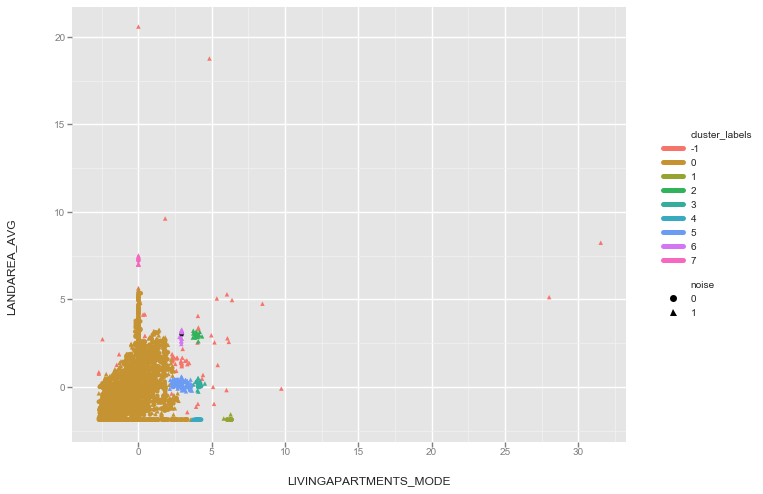

<ggplot: (-9223372036829463208)>

In [84]:
p4

In [79]:
cluster_vs_loan_issues3

label,0,1
cluster_labels,,
-1,30,30
0,7612,648
1,13,0
2,14,0
3,18,0
4,18,2
5,49,3
6,15,0
7,10,0


In [77]:
X_train_cleaned3.shape

(8432, 122)

In [46]:
DataSummary.returnFrequencyCounts(X_train_cleaned1[['TARGET']],['TARGET'])

{'TARGET':    TARGET  count
 0  0       7878 
 1  1       683  }

In [47]:
DataSummary.returnFrequencyCounts(X_train_cleaned[['TARGET']],['TARGET'])

{'TARGET':    TARGET  count
 0  0       8046 
 1  1       683  }

In [48]:
DataSummary.returnFrequencyCounts(X_train[['TARGET']],['TARGET'])

{'TARGET':    TARGET  count
 0  0       8317 
 1  1       683  }

In [78]:
all_report1,col_list1=build_model(X_train_cleaned3,use_selected_feats=False)

This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 0.0001, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[610 300]
 [ 24  66]]

Auc Score: 0.7605006105006105

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.67      0.79       910
          1       0.18      0.73      0.29        90

avg / total       0.89      0.68      0.75      1000

This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 0.001, 'class_weight': 'balanc

In [73]:
all_report1,col_list1=build_model(X_train_cleaned2,use_selected_feats=False)

This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 0.0001, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[609 301]
 [ 24  66]]

Auc Score: 0.7589621489621489

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.67      0.79       910
          1       0.18      0.73      0.29        90

avg / total       0.89      0.68      0.74      1000

This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 0.001, 'class_weight': 'balanc

In [61]:
all_report1,col_list1=build_model(X_train_cleaned1,use_selected_feats=False)

This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 0.0001, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[613 297]
 [ 25  65]]

Auc Score: 0.7554334554334554

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.67      0.79       910
          1       0.18      0.72      0.29        90

avg / total       0.89      0.68      0.75      1000

This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 0.001, 'class_weight': 'balanc

In [74]:
X_train_cleaned2.to_csv('C:/Users/vberlia/Documents/train_2.csv')

In [19]:
all_report,col_list=build_model(X_train_cleaned,use_selected_feats=False)

This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 0.001, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[633 277]
 [ 27  63]]

Auc Score: 0.7733577533577535

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.70      0.81       910
          1       0.19      0.70      0.29        90

avg / total       0.89      0.70      0.76      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 0.01, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[628 282]
 [ 25  65]]

Auc Score: 0.7649206349206349

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.69      0.80       910
          1       0.19      0.72      0.30        90

avg / total       0.89      0.69      0.76      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 0.1, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[628 282]
 [ 26  64]]

Auc Score: 0.7610256410256411

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.69      0.80       910
          1       0.18      0.71      0.29        90

avg / total       0.89      0.69      0.76      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 0.3, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[626 284]
 [ 26  64]]

Auc Score: 0.7606349206349207

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.69      0.80       910
          1       0.18      0.71      0.29        90

avg / total       0.89      0.69      0.76      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 0.5, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[627 283]
 [ 26  64]]

Auc Score: 0.7606105006105006

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.69      0.80       910
          1       0.18      0.71      0.29        90

avg / total       0.89      0.69      0.76      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 0.7, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[627 283]
 [ 26  64]]

Auc Score: 0.7605372405372406

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.69      0.80       910
          1       0.18      0.71      0.29        90

avg / total       0.89      0.69      0.76      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 0.9, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[627 283]
 [ 26  64]]

Auc Score: 0.7604639804639806

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.69      0.80       910
          1       0.18      0.71      0.29        90

avg / total       0.89      0.69      0.76      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 1, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[627 283]
 [ 26  64]]

Auc Score: 0.7605616605616606

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.69      0.80       910
          1       0.18      0.71      0.29        90

avg / total       0.89      0.69      0.76      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 2, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[627 283]
 [ 26  64]]

Auc Score: 0.7604639804639806

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.69      0.80       910
          1       0.18      0.71      0.29        90

avg / total       0.89      0.69      0.76      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 5, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[627 283]
 [ 26  64]]

Auc Score: 0.7606715506715508

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.69      0.80       910
          1       0.18      0.71      0.29        90

avg / total       0.89      0.69      0.76      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 9, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[627 283]
 [ 26  64]]

Auc Score: 0.7605616605616606

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.69      0.80       910
          1       0.18      0.71      0.29        90

avg / total       0.89      0.69      0.76      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 13, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[627 283]
 [ 26  64]]

Auc Score: 0.7605250305250306

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.69      0.80       910
          1       0.18      0.71      0.29        90

avg / total       0.89      0.69      0.76      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 15, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[627 283]
 [ 26  64]]

Auc Score: 0.7604761904761905

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.69      0.80       910
          1       0.18      0.71      0.29        90

avg / total       0.89      0.69      0.76      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 17, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[627 283]
 [ 26  64]]

Auc Score: 0.7603907203907203

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.69      0.80       910
          1       0.18      0.71      0.29        90

avg / total       0.89      0.69      0.76      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 19, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[627 283]
 [ 26  64]]

Auc Score: 0.7605006105006106

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.69      0.80       910
          1       0.18      0.71      0.29        90

avg / total       0.89      0.69      0.76      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 21, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[627 283]
 [ 26  64]]

Auc Score: 0.7605982905982906

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.69      0.80       910
          1       0.18      0.71      0.29        90

avg / total       0.89      0.69      0.76      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 50, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[627 283]
 [ 26  64]]

Auc Score: 0.7604884004884006

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.69      0.80       910
          1       0.18      0.71      0.29        90

avg / total       0.89      0.69      0.76      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 100, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[627 283]
 [ 26  64]]

Auc Score: 0.7604517704517705

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.69      0.80       910
          1       0.18      0.71      0.29        90

avg / total       0.89      0.69      0.76      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 1000, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[627 283]
 [ 26  64]]

Auc Score: 0.7605494505494507

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.69      0.80       910
          1       0.18      0.71      0.29        90

avg / total       0.89      0.69      0.76      1000

This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 0.001, 'class_weight': 'None'}"}

C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 0.01, 'class_weight': 'None'}"}

Confusion Matrix:
[[909   1]
 [ 90   0]]

Auc Score: 0.7716483516483517

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       0.00      0.00      0.00        90

avg / total       0.83      0.91      0.87      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 0.1, 'class_weight': 'None'}"}

Confusion Matrix:
[[908   2]
 [ 90   0]]

Auc Score: 0.7683272283272283

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       0.00      0.00      0.00        90

avg / total       0.83      0.91      0.87      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 0.3, 'class_weight': 'None'}"}

Confusion Matrix:
[[907   3]
 [ 90   0]]

Auc Score: 0.7677777777777777

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       0.00      0.00      0.00        90

avg / total       0.83      0.91      0.87      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 0.5, 'class_weight': 'None'}"}

Confusion Matrix:
[[907   3]
 [ 90   0]]

Auc Score: 0.7678998778998778

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       0.00      0.00      0.00        90

avg / total       0.83      0.91      0.87      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 0.7, 'class_weight': 'None'}"}

Confusion Matrix:
[[907   3]
 [ 90   0]]

Auc Score: 0.7678144078144078

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       0.00      0.00      0.00        90

avg / total       0.83      0.91      0.87      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 0.9, 'class_weight': 'None'}"}

Confusion Matrix:
[[907   3]
 [ 90   0]]

Auc Score: 0.7678021978021978

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       0.00      0.00      0.00        90

avg / total       0.83      0.91      0.87      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 1, 'class_weight': 'None'}"}

Confusion Matrix:
[[907   3]
 [ 90   0]]

Auc Score: 0.767838827838828

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       0.00      0.00      0.00        90

avg / total       0.83      0.91      0.87      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 2, 'class_weight': 'None'}"}

Confusion Matrix:
[[907   3]
 [ 90   0]]

Auc Score: 0.7677167277167278

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       0.00      0.00      0.00        90

avg / total       0.83      0.91      0.87      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 5, 'class_weight': 'None'}"}

Confusion Matrix:
[[907   3]
 [ 90   0]]

Auc Score: 0.7677045177045176

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       0.00      0.00      0.00        90

avg / total       0.83      0.91      0.87      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 9, 'class_weight': 'None'}"}

Confusion Matrix:
[[908   2]
 [ 90   0]]

Auc Score: 0.7677655677655678

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       0.00      0.00      0.00        90

avg / total       0.83      0.91      0.87      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 13, 'class_weight': 'None'}"}

Confusion Matrix:
[[907   3]
 [ 90   0]]

Auc Score: 0.7676068376068377

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       0.00      0.00      0.00        90

avg / total       0.83      0.91      0.87      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 15, 'class_weight': 'None'}"}

Confusion Matrix:
[[907   3]
 [ 90   0]]

Auc Score: 0.7676312576312577

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       0.00      0.00      0.00        90

avg / total       0.83      0.91      0.87      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 17, 'class_weight': 'None'}"}

Confusion Matrix:
[[907   3]
 [ 90   0]]

Auc Score: 0.7676678876678877

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       0.00      0.00      0.00        90

avg / total       0.83      0.91      0.87      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 19, 'class_weight': 'None'}"}

Confusion Matrix:
[[907   3]
 [ 90   0]]

Auc Score: 0.7676312576312577

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       0.00      0.00      0.00        90

avg / total       0.83      0.91      0.87      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 21, 'class_weight': 'None'}"}

Confusion Matrix:
[[908   2]
 [ 90   0]]

Auc Score: 0.7677167277167277

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       0.00      0.00      0.00        90

avg / total       0.83      0.91      0.87      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 50, 'class_weight': 'None'}"}

Confusion Matrix:
[[907   3]
 [ 90   0]]

Auc Score: 0.7676923076923078

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       0.00      0.00      0.00        90

avg / total       0.83      0.91      0.87      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 100, 'class_weight': 'None'}"}

Confusion Matrix:
[[907   3]
 [ 90   0]]

Auc Score: 0.7676923076923077

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       0.00      0.00      0.00        90

avg / total       0.83      0.91      0.87      1000

This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 1000, 'class_weight': 'None'}"}

Conf

C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [30]:
all_report.to_csv('C:/Users/vberlia/Documents/all_report_db_scan_removed_zero.csv',index=None)

In [27]:
result = pd.merge(feature_weights_old,
                 feature_weights,
                 on='feat_name', 
                 how='left')

,feat_name,0,0
0,EXT_SOURCE_3,0.342958,0.341090
1,EXT_SOURCE_2,0.255334,0.256630
2,EXT_SOURCE_1,0.114284,0.110867
3,EXT_SOURCE_1_is_missing,0.075403,0.073099
4,AMT_GOODS_PRICE,0.073957,0.074296
5,AMT_ANNUITY,0.069739,0.069732
6,REGION_POPULATION_RELATIVE,0.063206,0.060793
7,DAYS_ID_PUBLISH,0.061460,0.060969
8,NAME_EDUCATION_TYPE_freq,0.059415,0.054428
9,occupation_type_secretaries,0.058782,0.056649


In [26]:
feature_weights_old=pd.read_csv('C:/Users/vberlia/Documents/feat_weights.csv')

In [25]:
feature_weights

,feat_name,0
278,EXT_SOURCE_3,0.341090
267,EXT_SOURCE_2,0.256630
227,EXT_SOURCE_1,0.110867
275,AMT_GOODS_PRICE,0.074296
3,EXT_SOURCE_1_is_missing,0.073099
241,AMT_ANNUITY,0.069732
238,DAYS_ID_PUBLISH,0.060969
236,REGION_POPULATION_RELATIVE,0.060793
306,LIVINGAPARTMENTS_MODE,0.060377
165,occupation_type_secretaries,0.056649


In [24]:
feature_weights=pd.DataFrame(np.abs(all_report['model'].iloc[0].coef_)[0])
feature_weights.insert(0,'feat_name',col_list[:-1])
feature_weights=feature_weights.sort_values(ascending=False,by=0)
# feature_weights.to_csv('C:/Users/vberlia/Documents/feat_weights_cleaned_both_class.csv',index=None)

In [8]:
all_report,col_list=build_model(X_train,use_selected_feats=False)

This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 0.001, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[636 274]
 [ 29  61]]

Auc Score: 0.7557509157509158

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.70      0.81       910
          1       0.18      0.68      0.29        90

avg / total       0.89      0.70      0.76      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 0.01, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[632 278]
 [ 29  61]]

Auc Score: 0.751990231990232

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.69      0.80       910
          1       0.18      0.68      0.28        90

avg / total       0.89      0.69      0.76      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 0.1, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[632 278]
 [ 29  61]]

Auc Score: 0.7482051282051282

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.69      0.80       910
          1       0.18      0.68      0.28        90

avg / total       0.89      0.69      0.76      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 0.3, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[633 277]
 [ 29  61]]

Auc Score: 0.7476556776556776

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.70      0.81       910
          1       0.18      0.68      0.29        90

avg / total       0.89      0.69      0.76      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 0.5, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[636 274]
 [ 29  61]]

Auc Score: 0.7477167277167277

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.70      0.81       910
          1       0.18      0.68      0.29        90

avg / total       0.89      0.70      0.76      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 0.7, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[636 274]
 [ 29  61]]

Auc Score: 0.7477533577533577

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.70      0.81       910
          1       0.18      0.68      0.29        90

avg / total       0.89      0.70      0.76      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 0.9, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[636 274]
 [ 29  61]]

Auc Score: 0.7477167277167277

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.70      0.81       910
          1       0.18      0.68      0.29        90

avg / total       0.89      0.70      0.76      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 1, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[636 274]
 [ 29  61]]

Auc Score: 0.7476800976800977

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.70      0.81       910
          1       0.18      0.68      0.29        90

avg / total       0.89      0.70      0.76      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 2, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[636 274]
 [ 29  61]]

Auc Score: 0.7478021978021979

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.70      0.81       910
          1       0.18      0.68      0.29        90

avg / total       0.89      0.70      0.76      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 5, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[636 274]
 [ 29  61]]

Auc Score: 0.7477289377289378

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.70      0.81       910
          1       0.18      0.68      0.29        90

avg / total       0.89      0.70      0.76      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 9, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[636 274]
 [ 29  61]]

Auc Score: 0.7475824175824175

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.70      0.81       910
          1       0.18      0.68      0.29        90

avg / total       0.89      0.70      0.76      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 13, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[636 274]
 [ 29  61]]

Auc Score: 0.7475579975579977

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.70      0.81       910
          1       0.18      0.68      0.29        90

avg / total       0.89      0.70      0.76      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 15, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[636 274]
 [ 29  61]]

Auc Score: 0.7477167277167278

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.70      0.81       910
          1       0.18      0.68      0.29        90

avg / total       0.89      0.70      0.76      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 17, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[636 274]
 [ 29  61]]

Auc Score: 0.7477533577533577

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.70      0.81       910
          1       0.18      0.68      0.29        90

avg / total       0.89      0.70      0.76      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 19, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[636 274]
 [ 29  61]]

Auc Score: 0.7476800976800978

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.70      0.81       910
          1       0.18      0.68      0.29        90

avg / total       0.89      0.70      0.76      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 21, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[636 274]
 [ 29  61]]

Auc Score: 0.747826617826618

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.70      0.81       910
          1       0.18      0.68      0.29        90

avg / total       0.89      0.70      0.76      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 50, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[636 274]
 [ 29  61]]

Auc Score: 0.7476678876678877

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.70      0.81       910
          1       0.18      0.68      0.29        90

avg / total       0.89      0.70      0.76      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 100, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[636 274]
 [ 29  61]]

Auc Score: 0.7475579975579976

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.70      0.81       910
          1       0.18      0.68      0.29        90

avg / total       0.89      0.70      0.76      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 1000, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[636 274]
 [ 29  61]]

Auc Score: 0.7476678876678877

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.70      0.81       910
          1       0.18      0.68      0.29        90

avg / total       0.89      0.70      0.76      1000

This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 0.001, 'class_weight': 'None'}"}

C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 0.01, 'class_weight': 'None'}"}

Confusion Matrix:
[[910   0]
 [ 90   0]]

Auc Score: 0.7546031746031746

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       0.00      0.00      0.00        90

avg / total       0.83      0.91      0.87      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 0.1, 'class_weight': 'None'}"}

Confusion Matrix:
[[908   2]
 [ 90   0]]

Auc Score: 0.7525518925518926

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       0.00      0.00      0.00        90

avg / total       0.83      0.91      0.87      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 0.3, 'class_weight': 'None'}"}

Confusion Matrix:
[[908   2]
 [ 90   0]]

Auc Score: 0.7521855921855922

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       0.00      0.00      0.00        90

avg / total       0.83      0.91      0.87      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 0.5, 'class_weight': 'None'}"}

Confusion Matrix:
[[908   2]
 [ 90   0]]

Auc Score: 0.7522100122100122

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       0.00      0.00      0.00        90

avg / total       0.83      0.91      0.87      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 0.7, 'class_weight': 'None'}"}

Confusion Matrix:
[[908   2]
 [ 90   0]]

Auc Score: 0.751978021978022

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       0.00      0.00      0.00        90

avg / total       0.83      0.91      0.87      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 0.9, 'class_weight': 'None'}"}

Confusion Matrix:
[[908   2]
 [ 90   0]]

Auc Score: 0.7520879120879121

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       0.00      0.00      0.00        90

avg / total       0.83      0.91      0.87      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 1, 'class_weight': 'None'}"}

Confusion Matrix:
[[908   2]
 [ 90   0]]

Auc Score: 0.751978021978022

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       0.00      0.00      0.00        90

avg / total       0.83      0.91      0.87      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 2, 'class_weight': 'None'}"}

Confusion Matrix:
[[909   1]
 [ 90   0]]

Auc Score: 0.752051282051282

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       0.00      0.00      0.00        90

avg / total       0.83      0.91      0.87      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 5, 'class_weight': 'None'}"}

Confusion Matrix:
[[908   2]
 [ 90   0]]

Auc Score: 0.7518437118437119

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       0.00      0.00      0.00        90

avg / total       0.83      0.91      0.87      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 9, 'class_weight': 'None'}"}

Confusion Matrix:
[[908   2]
 [ 90   0]]

Auc Score: 0.7518925518925519

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       0.00      0.00      0.00        90

avg / total       0.83      0.91      0.87      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 13, 'class_weight': 'None'}"}

Confusion Matrix:
[[908   2]
 [ 90   0]]

Auc Score: 0.7518315018315018

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       0.00      0.00      0.00        90

avg / total       0.83      0.91      0.87      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 15, 'class_weight': 'None'}"}

Confusion Matrix:
[[908   2]
 [ 90   0]]

Auc Score: 0.751990231990232

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       0.00      0.00      0.00        90

avg / total       0.83      0.91      0.87      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 17, 'class_weight': 'None'}"}

Confusion Matrix:
[[908   2]
 [ 90   0]]

Auc Score: 0.752014652014652

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       0.00      0.00      0.00        90

avg / total       0.83      0.91      0.87      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 19, 'class_weight': 'None'}"}

Confusion Matrix:
[[908   2]
 [ 90   0]]

Auc Score: 0.7520634920634921

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       0.00      0.00      0.00        90

avg / total       0.83      0.91      0.87      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 21, 'class_weight': 'None'}"}

Confusion Matrix:
[[908   2]
 [ 90   0]]

Auc Score: 0.751941391941392

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       0.00      0.00      0.00        90

avg / total       0.83      0.91      0.87      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 50, 'class_weight': 'None'}"}

Confusion Matrix:
[[908   2]
 [ 90   0]]

Auc Score: 0.7518925518925519

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       0.00      0.00      0.00        90

avg / total       0.83      0.91      0.87      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 100, 'class_weight': 'None'}"}

Confusion Matrix:
[[908   2]
 [ 90   0]]

Auc Score: 0.751941391941392

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       0.00      0.00      0.00        90

avg / total       0.83      0.91      0.87      1000

This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 1000, 'class_weight': 'None'}"}

Confu

C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [53]:
all_report,col_list=build_model(X_train,use_selected_feats=True,top_feats=top_ten_feats)

This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 0.001, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[633 277]
 [ 25  65]]

Auc Score: 0.7534920634920634

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.70      0.81       910
          1       0.19      0.72      0.30        90

avg / total       0.89      0.70      0.76      1000

This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 0.01, 'class_weight': 'balanced

C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 5, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[620 290]
 [ 27  63]]

Auc Score: 0.7517704517704518

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.68      0.80       910
          1       0.18      0.70      0.28        90

avg / total       0.89      0.68      0.75      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 9, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[620 290]
 [ 27  63]]

Auc Score: 0.7517704517704518

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.68      0.80       910
          1       0.18      0.70      0.28        90

avg / total       0.89      0.68      0.75      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 13, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[620 290]
 [ 27  63]]

Auc Score: 0.7517704517704518

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.68      0.80       910
          1       0.18      0.70      0.28        90

avg / total       0.89      0.68      0.75      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 15, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[620 290]
 [ 27  63]]

Auc Score: 0.7517704517704518

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.68      0.80       910
          1       0.18      0.70      0.28        90

avg / total       0.89      0.68      0.75      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 17, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[620 290]
 [ 27  63]]

Auc Score: 0.7517704517704518

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.68      0.80       910
          1       0.18      0.70      0.28        90

avg / total       0.89      0.68      0.75      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 19, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[620 290]
 [ 27  63]]

Auc Score: 0.7517704517704518

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.68      0.80       910
          1       0.18      0.70      0.28        90

avg / total       0.89      0.68      0.75      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 21, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[620 290]
 [ 27  63]]

Auc Score: 0.7517704517704518

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.68      0.80       910
          1       0.18      0.70      0.28        90

avg / total       0.89      0.68      0.75      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 50, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[620 290]
 [ 27  63]]

Auc Score: 0.7517704517704518

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.68      0.80       910
          1       0.18      0.70      0.28        90

avg / total       0.89      0.68      0.75      1000

This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 100, 'class_weight': 'balanced'}"}

C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 1000, 'class_weight': 'balanced'}"}

Confusion Matrix:
[[620 290]
 [ 27  63]]

Auc Score: 0.7517704517704518

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.68      0.80       910
          1       0.18      0.70      0.28        90

avg / total       0.89      0.68      0.75      1000

This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 0.001, 'class_weight': 'None'}"}

C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 0.3, 'class_weight': 'None'}"}

Confusion Matrix:
[[910   0]
 [ 89   1]]

Auc Score: 0.7538705738705739

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       1.00      0.01      0.02        90

avg / total       0.92      0.91      0.87      1000

This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 0.5, 'class_weight': 'None'}"}

Confu

C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 1, 'class_weight': 'None'}"}

Confusion Matrix:
[[910   0]
 [ 89   1]]

Auc Score: 0.7537362637362638

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       1.00      0.01      0.02        90

avg / total       0.92      0.91      0.87      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 2, 'class_weight': 'None'}"}

Confusion Matrix:
[[910   0]
 [ 89   1]]

Auc Score: 0.7537362637362637

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       1.00      0.01      0.02        90

avg / total       0.92      0.91      0.87      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 5, 'class_weight': 'None'}"}

Confusion Matrix:
[[910   0]
 [ 89   1]]

Auc Score: 0.7537484737484738

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       1.00      0.01      0.02        90

avg / total       0.92      0.91      0.87      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 9, 'class_weight': 'None'}"}

Confusion Matrix:
[[910   0]
 [ 89   1]]

Auc Score: 0.7537973137973137

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       1.00      0.01      0.02        90

avg / total       0.92      0.91      0.87      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 13, 'class_weight': 'None'}"}

Confusion Matrix:
[[910   0]
 [ 89   1]]

Auc Score: 0.7538095238095237

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       1.00      0.01      0.02        90

avg / total       0.92      0.91      0.87      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 15, 'class_weight': 'None'}"}

Confusion Matrix:
[[910   0]
 [ 89   1]]

Auc Score: 0.7538095238095237

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       1.00      0.01      0.02        90

avg / total       0.92      0.91      0.87      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 17, 'class_weight': 'None'}"}

Confusion Matrix:
[[910   0]
 [ 89   1]]

Auc Score: 0.7538095238095237

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       1.00      0.01      0.02        90

avg / total       0.92      0.91      0.87      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 19, 'class_weight': 'None'}"}

Confusion Matrix:
[[910   0]
 [ 89   1]]

Auc Score: 0.7537973137973137

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       1.00      0.01      0.02        90

avg / total       0.92      0.91      0.87      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 21, 'class_weight': 'None'}"}

Confusion Matrix:
[[910   0]
 [ 89   1]]

Auc Score: 0.7537973137973137

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       1.00      0.01      0.02        90

avg / total       0.92      0.91      0.87      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 50, 'class_weight': 'None'}"}

Confusion Matrix:
[[910   0]
 [ 89   1]]

Auc Score: 0.7538095238095238

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       1.00      0.01      0.02        90

avg / total       0.92      0.91      0.87      1000



C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 100, 'class_weight': 'None'}"}

Confusion Matrix:
[[910   0]
 [ 89   1]]

Auc Score: 0.7538095238095238

Classification Report:
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       910
          1       1.00      0.01      0.02        90

avg / total       0.92      0.91      0.87      1000

This function will generate the classification report for each pipelines best parameter fit classification report:

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Model -> {'LR'}
Pipeline -> no-pipeline

Param -> {"{'penalty': 'l2', 'C': 1000, 'class_weight': 'None'}"}

Conf

C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [54]:
all_report.to_csv("C:/Users/vberlia/Documents/all_report3.csv",index=None)

In [62]:
raw_columns

['FLOORSMIN_MODE',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'REG_REGION_NOT_LIVE_REGION',
 'EXT_SOURCE_1',
 'COMMONAREA_MEDI',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'FLAG_DOCUMENT_5',
 'FLAG_EMP_PHONE',
 'YEARS_BUILD_MEDI',
 'FLOORSMAX_AVG',
 'FLAG_DOCUMENT_9',
 'AMT_INCOME_TOTAL',
 'REGION_POPULATION_RELATIVE',
 'HOUR_APPR_PROCESS_START',
 'DAYS_ID_PUBLISH',
 'YEARS_BUILD_MODE',
 'LANDAREA_AVG',
 'AMT_ANNUITY',
 'AMT_CREDIT',
 'FLAG_DOCUMENT_7',
 'COMMONAREA_MODE',
 'FLAG_DOCUMENT_6',
 'NONLIVINGAREA_MEDI',
 'NONLIVINGAREA_AVG',
 'FLAG_EMAIL',
 'APARTMENTS_MEDI',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'FLOORSMAX_MEDI',
 'LIVINGAPARTMENTS_AVG',
 'FLAG_DOCUMENT_16',
 'LIVINGAREA_AVG',
 'FLAG_DOCUMENT_3',
 'ENTRANCES_AVG',
 'FLAG_DOCUMENT_17',
 'ENTRANCES_MEDI',
 'NONLIVINGAPARTMENTS_AVG',
 'FLAG_DOCUMENT_11',
 'COMMONAREA_AVG',
 'FLOORSMAX_MODE',
 'REG_REGION_NOT_WORK_REGION',
 'YEARS_BEGINEXPLUATATION_MODE',
 'DAYS_LAST_PHONE_CHANGE',
 'YEARS_BUILD_AVG',
 'EXT_SOURCE_2',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'LIVINGARE

In [68]:
fig = PlotlyVisualization.createHistPlotForVarForBinaryClass2(X_train[['TARGET', 'LIVINGAREA_MODE']], 'TARGET', 'LIVINGAREA_MODE', 'No Loan Issue', 'Loan Issue','LIVINGAREA_MODE')
py.iplot(fig, filename='overlaid histogram') 

In [66]:
fig = PlotlyVisualization.createHistPlotForVarForBinaryClass2(X_train_cleaned1[['TARGET', 'LIVINGAREA_MODE']], 'TARGET', 'LIVINGAREA_MODE', 'No Loan Issue', 'Loan Issue','LIVINGAREA_MODE')
py.iplot(fig, filename='overlaid histogram') 

In [35]:
fig = PlotlyVisualization.createHistPlotForVarForBinaryClass2(X_train[['TARGET', 'LANDAREA_AVG']], 'TARGET', 'LANDAREA_AVG', 'No Loan Issue', 'Loan Issue','LANDAREA_AVG')
py.iplot(fig, filename='overlaid histogram')    

In [103]:
tmp=X_train.copy()

In [105]:
all_pipes = []
quant_miss_pipes = []
quant_miss_pipes.append(('miss_impute_cols', CustomQuantitativeImputer(cols=raw_columns, strategy="median")))
all_pipes.append(Pipeline(quant_miss_pipes))

In [109]:
tmp=Pipeline(quant_miss_pipes).fit(tmp).transform(tmp)

In [127]:
DataSummary.returnFrequencyCounts(tmp[['TARGET','YEARS_BEGINEXPLUATATION_MEDI' ]],['YEARS_BEGINEXPLUATATION_MEDI'])

{'YEARS_BEGINEXPLUATATION_MEDI':      YEARS_BEGINEXPLUATATION_MEDI  count
 0    0.9821                        4453 
 1    0.9856                        153  
 2    0.9861                        127  
 3    0.9851                        126  
 4    0.9871                        126  
 5    0.9811                        125  
 6    0.9841                        124  
 7    0.9806                        122  
 8    0.9836                        120  
 9    0.9866                        119  
 10   0.9796                        117  
 11   0.9831                        116  
 12   0.9776                        115  
 13   0.9786                        114  
 14   0.9876                        113  
 15   0.9791                        109  
 16   0.9781                        109  
 17   0.9801                        108  
 18   0.9846                        101  
 19   0.9816                        100  
 20   0.9826                        99   
 21   0.9771                        96   
 2

In [9]:
from sklearn.preprocessing import Imputer
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

def create_dbscan_cluster(X,labels_true_col,eps=0.3,min_samples=10):
    data=X.copy()
    labels_true=X[labels_true_col]
    X=X.drop(labels_true_col,axis=1)

    imputer = Imputer(strategy="mean")
    X=imputer.fit_transform(X)

    X = StandardScaler().fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    labels=db.labels_    
    
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
    print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
    print("Adjusted Rand Index: %0.3f"
          % metrics.adjusted_rand_score(labels_true, labels))
    print("Adjusted Mutual Information: %0.3f"
          % metrics.adjusted_mutual_info_score(labels_true, labels))
    print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(X, labels))

    noise = np.ones_like(db.labels_)
    noise[db.core_sample_indices_] = 0
    a = pd.DataFrame(X)
    a.columns = data.columns[:-1]
    a['label']=labels_true
    a['noise']=noise
    a['cluster_labels']=db.labels_

    a['noise']=a['noise'].astype(str)
    a['label']=a['label'].astype(str)
    a['cluster_labels']=a['cluster_labels'].astype(str)

    print("\nShowing how the clusters are looking in the first two columns of input:\n")
    p1=ggplot(a, aes(x=data.columns[0], y=data.columns[1],color="cluster_labels",shape='noise')) + geom_point()
    return p1,db,a

In [10]:
print("Creating clusters\n")
cols=['LIVINGAPARTMENTS_MODE','LANDAREA_AVG']
cols.append('TARGET')
p1,db,a=create_dbscan_cluster(X_train[cols],'TARGET',eps=0.3)

cluster_vs_loan_issues = pd.crosstab(index=a["cluster_labels"], 
                           columns=a["label"])

# index_removal_list,candidate_clusters=clus_bus_algorithm(a,epsilon=0.07,percent_minority_class=0.5)
index_removal_list=[]

noisy_points=a[(a['cluster_labels']=='-1') & (a['label']=='0')].index
noisy_points=a[(a['cluster_labels']=='-1')].index
index_removal_list.extend(noisy_points)

bad_df=X_train.index.isin(index_removal_list)
X_train_cleaned=X_train[~bad_df].reset_index().drop('index',axis=1)

Creating clusters

Homogeneity: 0.001
Completeness: 0.002
V-measure: 0.001
Adjusted Rand Index: -0.015
Adjusted Mutual Information: 0.000
Silhouette Coefficient: 0.701

Showing how the clusters are looking in the first two columns of input:



In [11]:
X_train_cleaned.shape

(8715, 122)

In [72]:
fig = PlotlyVisualization.createHistPlotForVarForBinaryClass2(X_train_cleaned1[['TARGET','LIVINGAPARTMENTS_MODE']], 'TARGET', 'LIVINGAPARTMENTS_MODE', 'No Loan Issue', 'Loan Issue','LIVINGAPARTMENTS_MODE')
py.iplot(fig, filename='overlaid histogram')

In [71]:
fig = PlotlyVisualization.createHistPlotForVarForBinaryClass2(X_train[['TARGET','LIVINGAPARTMENTS_MODE']], 'TARGET', 'LIVINGAPARTMENTS_MODE', 'No Loan Issue', 'Loan Issue','LIVINGAPARTMENTS_MODE')
py.iplot(fig, filename='overlaid histogram')

In [82]:
fig = PlotlyVisualization.createHistPlotForVarForBinaryClass2(X_train[['TARGET','LANDAREA_AVG' ]], 'TARGET', 'LANDAREA_AVG', 'No Loan Issue', 'Loan Issue','LANDAREA_AVG')
py.iplot(fig, filename='overlaid histogram')

In [69]:
fig = PlotlyVisualization.createHistPlotForVarForBinaryClass2(X_train[['TARGET','EXT_SOURCE_3' ]], 'TARGET', 'EXT_SOURCE_3', 'No Loan Issue', 'Loan Issue','EXT_SOURCE_3')
py.iplot(fig, filename='overlaid histogram') 

In [68]:
fig = PlotlyVisualization.createHistPlotForVarForBinaryClass2(X_train[['TARGET','EXT_SOURCE_2' ]], 'TARGET', 'EXT_SOURCE_2', 'No Loan Issue', 'Loan Issue','EXT_SOURCE_2')
py.iplot(fig, filename='overlaid histogram')

In [79]:
DataSummary.returnSummaryDataFrame(X_train[['TARGET','AMT_GOODS_PRICE','AMT_ANNUITY', ]]).transpose()

,col_type,count_unique,unique_values,missing_count,count,mean,std,min,25%,50%(median),75%,max,mode
TARGET,int32,2,[0. 1.],0,9000,0.0758889,0.264835,0,0,0,0,1,NaN
AMT_GOODS_PRICE,float64,359,[ 270000. 225000. 1125000. 900000. 45000. 1305000. 180000.\n 675000. 1575000. 1354500. 634500. 828000. 315000. 1755000.\n 337500. 54000. 238500. 1350000. 468000. 202500. 450000.\n 540000. 117000. 864000. 405000. 877500. 67500. 135000.\n 351000. 360000. 679500. 157500. 1138500. 211500. 454500.\n 234000. 1602000. 477000. 247500. 252000. 562500. 715500.\n 643500. 409500. 913500. 423000. 522000. 585000. 121500.\n 463500. 630000. 432000. 1372500. 1800000. 927000. 342000.\n 621000. 823500. 103500. 126000. 90000. 832500. 904500.\n 607500. 495000. 184500. 796500. 279000. 292500. 229500.\n 508500. 553500. 306000. 1129500. 999000. 162000. 1080000.\n 1530000. 873000. 382500. 882000. 1102500. 1233000. 427500.\n 945000. 652500. 288000. 1003500. 720000. 396000. 387000.\n 333000. 472500. 369000. 738000. 688500. 810000. 99000.\n 148500. 535500. 697500. 734976. 58500. 774000. 2092500.\n 666000. 580500. 373500. 657000. 1620000. 936000. 576000.\n 297000. 481500. 364500. 967500. 931500. 459000. 418500.\n 355500. 990000. 517500. 216000. 171000. 1485000. 1363500.\n 85500. 1710000. 742500. 1116000. 724500. 661500. 301500.\n 778500. 490500. 612000. 328500. 706500. 855000. 310500.\n 1035000. 81000. 1831500. 589500. 243000. 283500. 1260000.\n 1809000. 486000. 1341000. 1120500. 175500. 256500. 94500.\n 787500. 702000. 909000. 819000. 274500. 648000. 2250000.\n 112500. 1732500. 1345500. 346500. 265500. 319500. 1183500.\n 918000. 765000. 1521000. 261000. 513000. 1026000. 684000.\n 441000. 198000. 531000. 1215000. 207000. 1813500. 922500.\n 1012500. 193500. nan 729000. 760500. 1053000. 1849500.\n 1759500. 976500. 1170000. 558000. 526500. 1147500. 324000.\n 144000. 756000. 1264500. 482530.5 153000. 886500. 1152000.\n 549000. 868500. 1579500. 1219500. 693000. 1255500. 1912500.\n 130500. 1822500. 1089000. 1237500. 751500. 478795.5 625500.\n 733500. 567000. 1075500. 220500. 1143000. 1327500. 72000.\n 166500. 1984500. 598500. 1440000. 1705500. 1197000. 1179000.\n 1980000. 189000. 1048500. 1039500. 846000. 504000. 499500.\n 1107000. 594000. 1395000. 1057500. 1084500. 958500. 994500.\n 841500. 1125112.5 139500. 76500. 1269000. 792000. 1282500.\n 1543500. 1404000. 972000. 1867500. 954000. 1071000. 983713.5\n 603000. 1098000. 1534500. 814500. 1507500. 436500. 1791000.\n 639000. 985500. 108000. 1165500. 1206000. 801000. 747000.\n 378000. 783000. 1156500. 981000. 1309500. 837000. 1377000.\n 391500. 850500. 616500. 1741500. 571500. 711000. 769500.\n 1300500. 544500. 2160000. 2007000. 1228500. 895500. 400500.\n 1242000. 1332000. 369256.5 1296000. 2200500. 330390. 2025000.\n 1323000. 940500. 1066500. 528183. 414000. 1017000. 1111500.\n 1426500. 49500. 1638000. 1062000. 1192500. 1552500. 445500.\n 1525500. 1093500. 1273500. 1318500. 1390500. 670500. 1161000.\n 620424. 1368000. 1386000. 1008000. 1044000. 2155500. 1251000.\n 1134000. 2254500. 1210500. 1030500. 1597500. 805500. 1381500.\n 1516500. 1656000. 193135.5 1723666.5 1692000. 963000. 1584000.\n 1845000. 1588500. 343840.5 1021500. 891000. 601389. 63000.\n 421213.5 418473. 1593000. 2205000. 1247643. 2700000. 1458000.\n 177444. 1687500. 371488.5],9,8991,535458,366866,45000,238500,450000,679500,2.7e+06,NaN
AMT_ANNUITY,float64,4001,[11718. 21294. 37800. ... 37188. 40950. 23584.5],0,9000,26964.7,14492.3,3316.5,16423.9,24750,34456.5,225000,NaN


In [80]:
fig = PlotlyVisualization.createHistPlotForVarForBinaryClass2(X_train[['TARGET','AMT_GOODS_PRICE' ]], 'TARGET', 'AMT_GOODS_PRICE', 'No Loan Issue', 'Loan Issue','AMT_GOODS_PRICE')
py.iplot(fig, filename='overlaid histogram')

In [74]:
fig = PlotlyVisualization.createHistPlotForVarForBinaryClass2(X_train[['TARGET','EXT_SOURCE_1' ]], 'TARGET', 'EXT_SOURCE_1', 'No Loan Issue', 'Loan Issue','EXT_SOURCE_1')
py.iplot(fig, filename='overlaid histogram')

In [60]:
X_train[['EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'EXT_SOURCE_1','AMT_GOODS_PRICE',
 'AMT_ANNUITY',
 'REGION_POPULATION_RELATIVE','DAYS_ID_PUBLISH','NAME_EDUCATION_TYPE','OCCUPATION_TYPE','TARGET']]

,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,AMT_GOODS_PRICE,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_ID_PUBLISH,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,TARGET
0,0.722393,0.741807,NaN,270000.0,11718.0,0.046220,-1542.0,Higher education,Core staff,0
1,0.384207,0.020911,NaN,225000.0,21294.0,0.018029,-2381.0,Secondary / secondary special,Accountants,0
2,0.501075,0.446803,0.399819,1125000.0,37800.0,0.006852,-3571.0,Higher education,Waiters/barmen staff,0
3,NaN,0.263144,NaN,900000.0,31653.0,0.031329,-4041.0,Secondary / secondary special,Private service staff,0
4,NaN,0.159679,NaN,45000.0,5535.0,0.031329,-2770.0,Secondary / secondary special,Accountants,0
5,0.285180,0.514092,NaN,1305000.0,67702.5,0.026392,-4075.0,Higher education,Core staff,0
6,0.175606,0.708067,0.431673,180000.0,9000.0,0.072508,-980.0,Incomplete higher,Laborers,0
7,NaN,0.417183,0.735821,675000.0,26284.5,0.026392,-74.0,Higher education,High skill tech staff,0
8,0.447179,0.668990,0.614609,225000.0,11074.5,0.026392,-3390.0,Higher education,Core staff,0
9,0.382502,0.502424,NaN,1575000.0,48456.0,0.009334,-2648.0,Secondary / secondary special,NaN,0


In [9]:
    one_hot_columns = ['CODE_GENDER', 'FLAG_CONT_MOBILE', 'FLAG_DOCUMENT_10',
                       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
                       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
                       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
                       'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
                       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
                       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
                       'FLAG_DOCUMENT_9', 'FLAG_EMAIL', 'FLAG_EMP_PHONE', 'FLAG_MOBIL',
                       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_PHONE', 'FLAG_WORK_PHONE',
                       'LIVE_CITY_NOT_WORK_CITY', 'LIVE_REGION_NOT_WORK_REGION',
                       'NAME_CONTRACT_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                       'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE', 'ORGANIZATION_TYPE',
                       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
                       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
                       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
                       'WEEKDAY_APPR_PROCESS_START', 'OCCUPATION_TYPE','CNT_CHILDREN']

In [12]:
DataSummary.returnSummaryDataFrame(X_train[one_hot_columns]).transpose()

,col_type,count_unique,unique_values,missing_count,count,mean,std,min,25%,50%(median),75%,max,mode
CNT_CHILDREN,float64,7,[0.0 1.0 2.0 3.0 4.0 6.0 5.0],0,9000,0.424778,0.728591,0,0,0,1,6,NaN
CODE_GENDER,object,2,['F' 'M'],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F
FLAG_CONT_MOBILE,object,2,[1 0],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
FLAG_DOCUMENT_10,object,1,[0],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
FLAG_DOCUMENT_11,object,2,[0 1],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
FLAG_DOCUMENT_12,object,1,[0],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
FLAG_DOCUMENT_13,object,2,[0 1],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
FLAG_DOCUMENT_14,object,2,[1 0],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
FLAG_DOCUMENT_15,object,2,[0 1],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
FLAG_DOCUMENT_16,object,2,[0 1],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [11]:
    one_hot_columns = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
                       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE',
                       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
                       'FLAG_MOBIL',
                       'NAME_INCOME_TYPE',
                       'FLAG_EMP_PHONE',
                       'FLAG_WORK_PHONE',
                       'FLAG_CONT_MOBILE',
                       'FLAG_PHONE',
                       'FLAG_EMAIL',
                       'FLAG_DOCUMENT_2',
                       'FLAG_DOCUMENT_3',
                       'FLAG_DOCUMENT_4',
                       'FLAG_DOCUMENT_5',
                       'FLAG_DOCUMENT_6',
                       'FLAG_DOCUMENT_7',
                       'FLAG_DOCUMENT_8',
                       'FLAG_DOCUMENT_9',
                       'FLAG_DOCUMENT_10',
                       'FLAG_DOCUMENT_11',
                       'FLAG_DOCUMENT_12',
                       'FLAG_DOCUMENT_13',
                       'FLAG_DOCUMENT_14',
                       'FLAG_DOCUMENT_15',
                       'FLAG_DOCUMENT_16',
                       'FLAG_DOCUMENT_17',
                       'FLAG_DOCUMENT_18',
                       'FLAG_DOCUMENT_19',
                       'FLAG_DOCUMENT_20',
                       'FLAG_DOCUMENT_21',
                       'WALLSMATERIAL_MODE',
                       'FONDKAPREMONT_MODE',
                       'OCCUPATION_TYPE',
                       'HOUSETYPE_MODE',
                       'EMERGENCYSTATE_MODE',
                       'WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE',
                       'REGION_RATING_CLIENT_W_CITY',
                       'REG_REGION_NOT_WORK_REGION',
                       'REGION_RATING_CLIENT',
                       'REG_CITY_NOT_WORK_CITY',
                       'LIVE_CITY_NOT_WORK_CITY',
                       'REG_REGION_NOT_LIVE_REGION',
                       'LIVE_REGION_NOT_WORK_REGION',
                       'REG_CITY_NOT_LIVE_CITY',
                       'CNT_CHILDREN'
                       ]

#     one_hot_columns = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
#                        'FLAG_OWN_REALTY', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE','CNT_CHILDREN']


'[0.0 1.0 2.0 3.0 4.0 6.0 5.0]'

In [26]:
a

,col_type,count_unique,unique_values,missing_count,count,mean,std,min,25%,50%(median),75%,max,mode
CNT_CHILDREN,float64,7,[0.0 1.0 2.0 3.0 4.0 6.0 5.0],0,9000,0.424778,0.728591,0,0,0,1,6,NaN
CODE_GENDER,object,2,['F' 'M'],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F
EMERGENCYSTATE_MODE,object,2,[nan 'No' 'Yes'],4200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
FLAG_CONT_MOBILE,float64,2,[1.0 0.0],0,9000,0.998,0.0446791,0,1,1,1,1,NaN
FLAG_DOCUMENT_10,object,1,[0],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
FLAG_DOCUMENT_11,object,2,[0 1],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
FLAG_DOCUMENT_12,object,1,[0],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
FLAG_DOCUMENT_13,object,2,[0 1],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
FLAG_DOCUMENT_14,object,2,[1 0],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
FLAG_DOCUMENT_15,object,2,[0 1],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [25]:
a=DataSummary.returnSummaryDataFrame(X_train[one_hot_columns]).transpose()
a[(a['count_unique']!=1) &( (a['unique_values']=='[0 1]') | (a['unique_values']=='[1 0]'))].index

Index(['FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_EMAIL', 'FLAG_EMP_PHONE',
       'FLAG_PHONE', 'FLAG_WORK_PHONE', 'LIVE_CITY_NOT_WORK_CITY',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION'],
      dtype='object')

In [45]:
all_report['model'].iloc[0].__dict__

{'C': 0.001,
 'class_weight': 'balanced',
 'classes_': array([0, 1]),
 'coef_': array([[ 1.42722545e-02, -9.63497535e-03, -2.88711858e-03,
          1.22487651e-02,  2.48628627e-03,  1.88511158e-02,
         -2.71412586e-03,  2.48628627e-03,  0.00000000e+00,
          7.54104836e-03,  0.00000000e+00,  6.09299014e-03,
          1.00717063e-02,  1.22487651e-02,  1.95939092e-03,
          1.22487651e-02, -2.04730021e-02,  7.54104836e-03,
          0.00000000e+00,  2.22446120e-03, -2.69086318e-02,
          1.22487651e-02, -2.04730021e-02,  1.22487651e-02,
          1.68064762e-02,  0.00000000e+00,  1.95939092e-03,
          2.48628627e-03,  0.00000000e+00,  2.22446120e-03,
          1.68064762e-02,  1.00717063e-02,  1.68308004e-02,
         -2.69086318e-02, -9.63497535e-03,  2.93350908e-04,
          2.93350908e-04,  0.00000000e+00,  0.00000000e+00,
         -2.71412586e-03,  6.53547719e-03,  2.93350908e-04,
          1.88511158e-02, -2.04730021e-02,  0.00000000e+00,
          7.54104836e